Dataset Source: UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
<br><br> Input variables <br><br>
bank client data:<br>
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br><br>
related with the last contact of the current campaign:<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')
<br> 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br> 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br> 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br><br> other attributes:
<br> 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br> 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br> 14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br> 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br><br> social and economic context attributes
<br>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>20 - nr.employed: number of employees - quarterly indicator (numeric)
<br><br> Output variable (desired target):
<br>21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
# Import the file 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("3_bank_marketing.csv",delimiter=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
# Create the matrix of input variables X:
# (1) Exclude column "duration"
# (2) Replace "unknown" by np.nan
# (3) Convert categorical variables into binary numeric by pd.get_dummies
X = data.drop(["duration","y"],axis=1)
X = X.replace("unknown",np.nan)
print(X)
X = pd.get_dummies(X)
print(X)
# Create the vector y for the target variable
y = data["y"]

      age          job  marital          education default housing loan  \
0      30  blue-collar  married           basic.9y      no     yes   no   
1      39     services   single        high.school      no      no   no   
2      25     services  married        high.school      no     yes   no   
3      38     services  married           basic.9y      no     NaN  NaN   
4      47       admin.  married  university.degree      no     yes   no   
...   ...          ...      ...                ...     ...     ...  ...   
4114   30       admin.  married           basic.6y      no     yes  yes   
4115   39       admin.  married        high.school      no     yes   no   
4116   27      student   single        high.school      no      no   no   
4117   58       admin.  married        high.school      no      no   no   
4118   34   management   single        high.school      no     yes   no   

        contact month day_of_week  campaign  pdays  previous     poutcome  \
0      cellular   may 

In [4]:
# Split the dataset into training and test set. Use stratify=y and random_state = 40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

In [5]:
# Fit a decision tree model to the training set (use random_state = 40, no other parameters)
# Report training and test set accuracy
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.818


In [6]:
# What is the depth of the resulting tree?
tree.get_depth()

24

In [7]:
# Fit decision tree models to the training set with different values of max_depth (always use random_state=40)
# Report training and test set accuracy
# What is the best value for max_depth according to this approach?
for m in range(1,25,1):
    tree = DecisionTreeClassifier(random_state=40, max_depth=m)
    tree.fit(X_train, y_train)
    print("{:.0f}: {:.3f} / {:.3f}".format(m, tree.score(X_train, y_train), tree.score(X_test, y_test)))

1: 0.891 / 0.890
2: 0.905 / 0.899
3: 0.906 / 0.899
4: 0.909 / 0.885
5: 0.913 / 0.893
6: 0.920 / 0.871
7: 0.930 / 0.875
8: 0.936 / 0.876
9: 0.944 / 0.870
10: 0.947 / 0.866
11: 0.953 / 0.859
12: 0.959 / 0.856
13: 0.964 / 0.855
14: 0.970 / 0.842
15: 0.973 / 0.835
16: 0.981 / 0.829
17: 0.986 / 0.824
18: 0.989 / 0.821
19: 0.993 / 0.826
20: 0.996 / 0.818
21: 0.998 / 0.817
22: 0.999 / 0.817
23: 1.000 / 0.815
24: 1.000 / 0.818


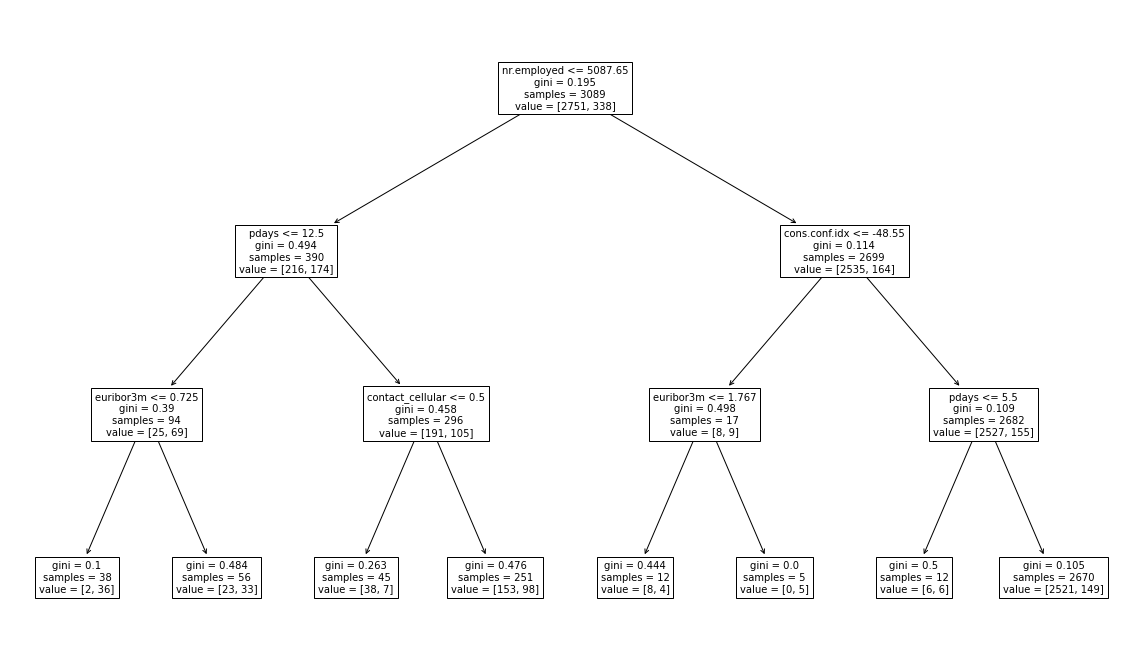

In [8]:
# Display the tree for max_depth=3
from sklearn import tree as tr
tree = DecisionTreeClassifier(random_state=40, max_depth=3)
tree.fit(X_train, y_train)
plt.figure(figsize=(20,12))
tr.plot_tree(tree, fontsize=10, feature_names=X.columns.values)
plt.show()

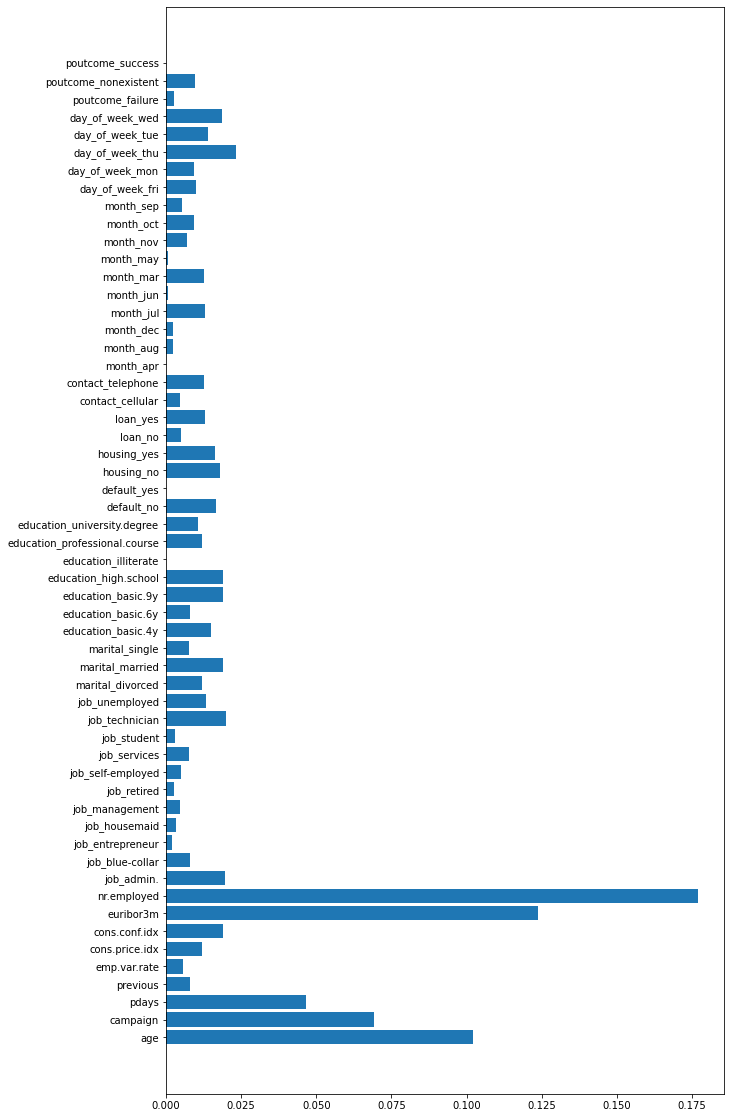

In [9]:
# Visualize the feature importance for the tree with infinite max_depth
# i.e. random_state=40, no other parameters
clf = DecisionTreeClassifier(random_state=40)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,20))
plt.barh(width=clf.feature_importances_,y=X.columns.values)
plt.show()

In [21]:
# Fit a random forest model to the training data set
# (use n_estimators=5, max_depth=20, max_features=20, random_state=30)
# Report training and test set accuracy
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, max_depth=20, max_features=20, random_state=30, n_jobs=-1)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.981
Accuracy on test set: 0.882


In [22]:
# How many cases in the test set would be predicted as positive ("yes")? What is the true number?
# (use n_estimators=5, max_depth=20, max_features=20, random_state=30)
print(np.sum(forest.predict(X_test)=="yes"))
print(np.sum(y_test=="yes"))

71
113


In [23]:
# Try to optimize the random forest model (use random_state = 30)
# Try other settings for n_estimators, max_depth, max_features:
# Does this change the calculation time and training / test accuracy?
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, max_depth=5, max_features=10, random_state=30, n_jobs=-1)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.913
Accuracy on test set: 0.894


In [52]:
# Fit a gradient boosting model to the training data set
# (use random_state = 30, no other parameters)
# Report training and test set accuracy
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=30)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.931
Accuracy on test set: 0.891


In [53]:
# What is the test accuracy on cases for which the prediction is assumed to be relatively certain 
# (i.e. probability <0.05 oder >0.95)?
# (use random_state = 30, no other parameters)
probabilities = np.array([x[0] for x in gbrt.predict_proba(X_test)])
predictions = gbrt.predict(X_test)
matches = predictions == y_test
np.mean(matches[(probabilities < 0.05) | (probabilities > 0.95)])

0.9504310344827587

In [54]:
# Try to optimize the gradient boosting model (use random_state = 30)
# Change e.g. learning_rate, n_estimators, min_samples_split, min_samples_leaf, max_depth, max_features
# Report training and test set accuracy
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=30, learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3, max_features=56) #default
gbrt = GradientBoostingClassifier(random_state=30, learning_rate=0.2, n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=2, max_features=56)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.916
Accuracy on test set: 0.903
